<a href="https://colab.research.google.com/github/Manas-arora/deep-learning/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Step 2: Load and Preprocess Data
def preprocess_data():
    (train_images, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()
    train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype("float32")
    train_images = (train_images - 127.5) / 127.5  # Normalize to [-1, 1]
    return tf.data.Dataset.from_tensor_slices(train_images).shuffle(60000).batch(64)

dataset = preprocess_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Step 3: Define the Generator
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding="same", use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding="same", use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding="same", use_bias=False, activation="tanh")
    ])
    return model

generator = build_generator()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 4: Define the Discriminator
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding="same", input_shape=(28, 28, 1)),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Conv2D(128, (5, 5), strides=(2, 2), padding="same"),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid")
    ])
    return model

discriminator = build_discriminator()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 5: Define Loss Functions and Optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy()

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
# Step 6: Training Function
@tf.function
def train_step(images):
    noise = tf.random.normal([64, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
# Step 7: Training Loop
def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch)
        print(f"Epoch {epoch + 1}/{epochs} completed")
        generate_and_save_images(generator, epoch + 1, tf.random.normal([16, 100]))

In [ ]:
# Step 8: Generate and Save Images
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    predictions = (predictions + 1) / 2.0  # Rescale to [0, 1]

    plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0], cmap="gray")
        plt.axis("off")
    plt.suptitle(f"Generated Images at Epoch {epoch}")
    plt.show()

Epoch 1/50 completed


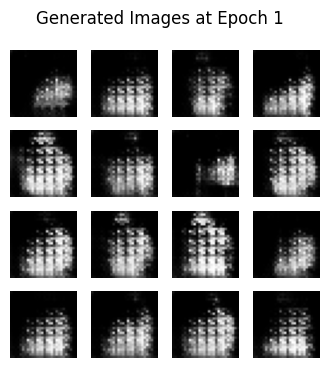

Epoch 2/50 completed


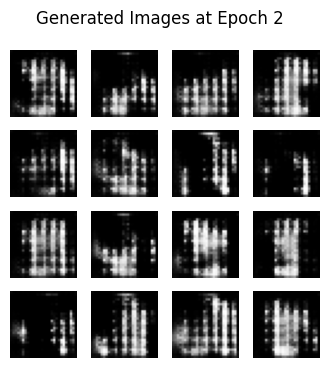

Epoch 3/50 completed


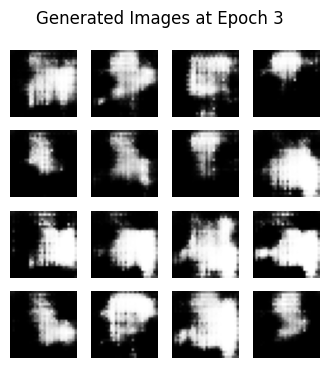

Epoch 4/50 completed


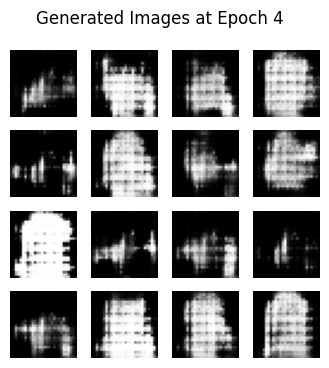

Epoch 5/50 completed


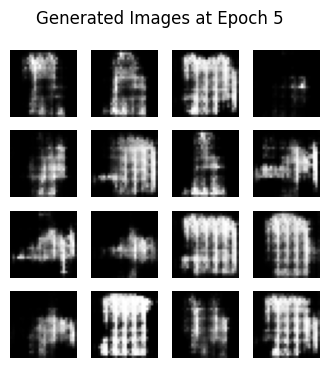

Epoch 6/50 completed


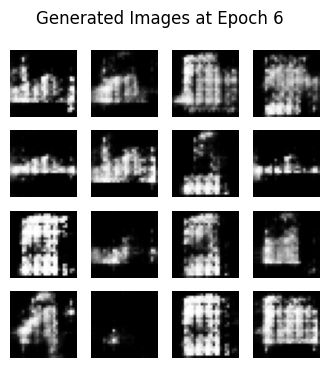

Epoch 7/50 completed


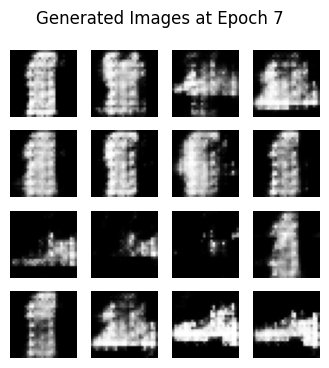

Epoch 8/50 completed


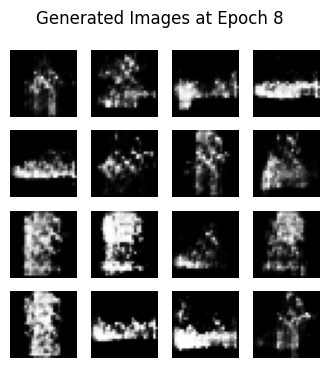

Epoch 9/50 completed


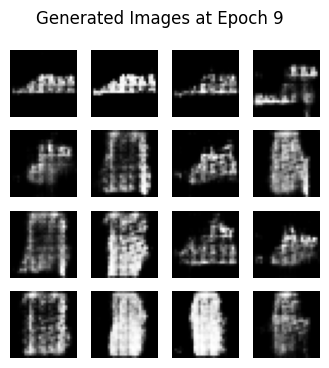

Epoch 10/50 completed


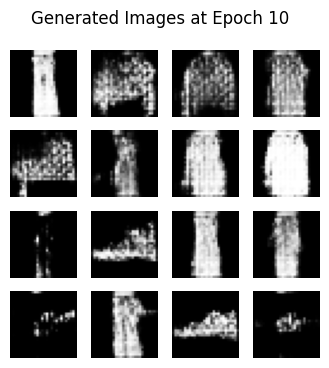

Epoch 11/50 completed


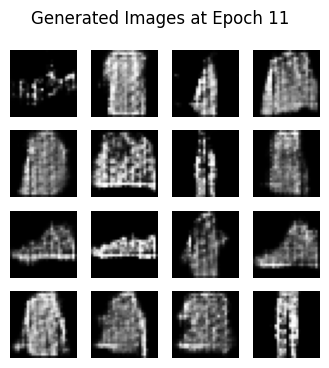

Epoch 12/50 completed


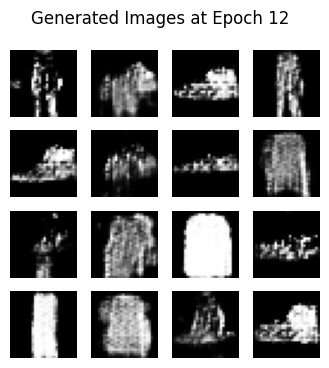

Epoch 13/50 completed


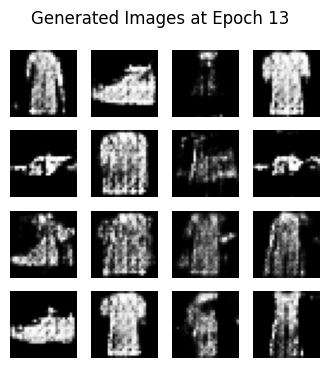

Epoch 14/50 completed


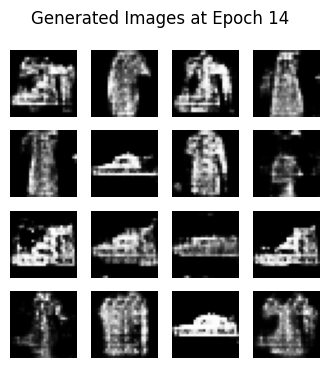

Epoch 15/50 completed


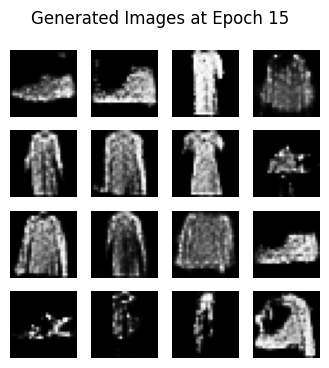

Epoch 16/50 completed


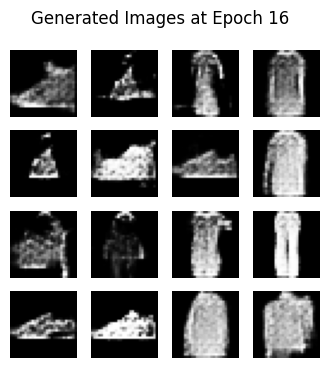

Epoch 17/50 completed


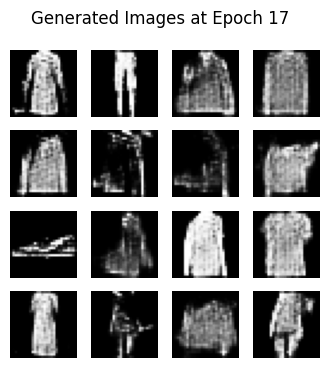

Epoch 18/50 completed


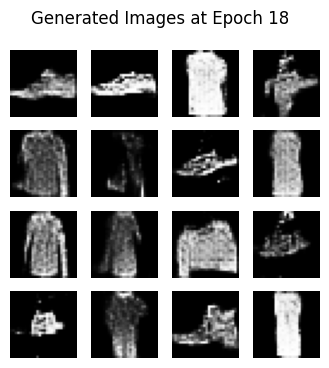

Epoch 19/50 completed


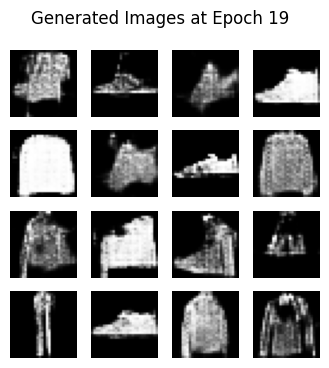

Epoch 20/50 completed


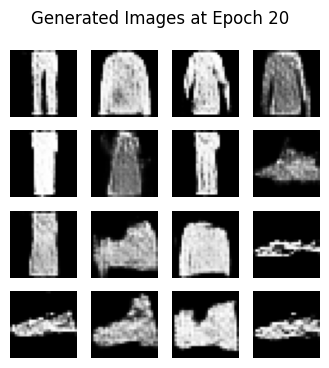

Epoch 21/50 completed


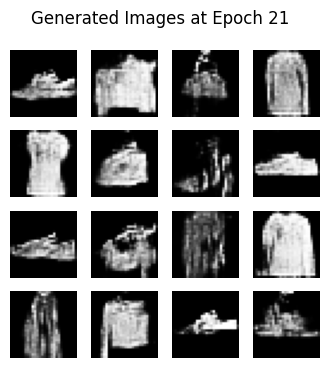

Epoch 22/50 completed


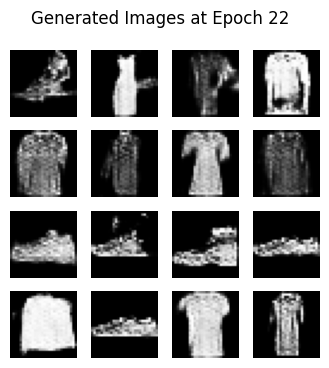

Epoch 23/50 completed


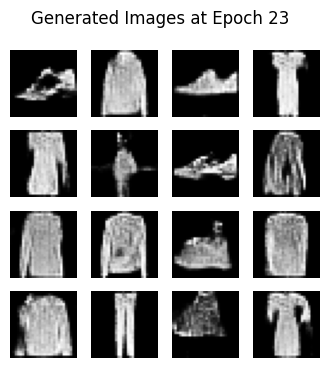

Epoch 24/50 completed


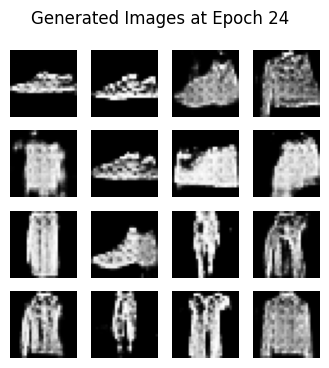

Epoch 25/50 completed


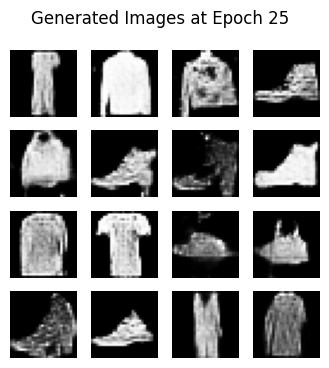

Epoch 26/50 completed


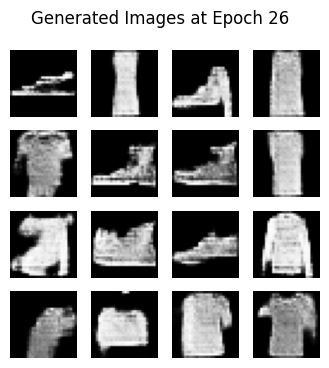

Epoch 27/50 completed


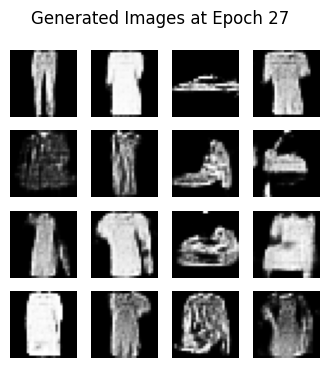

Epoch 28/50 completed


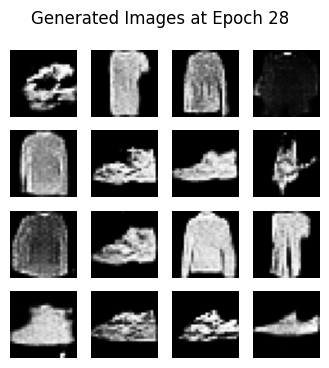

Epoch 29/50 completed


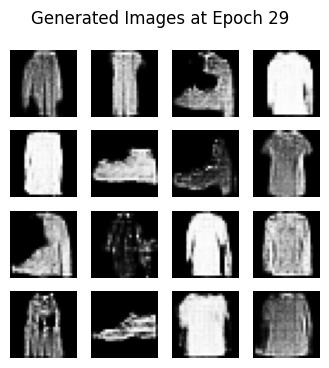

Epoch 30/50 completed


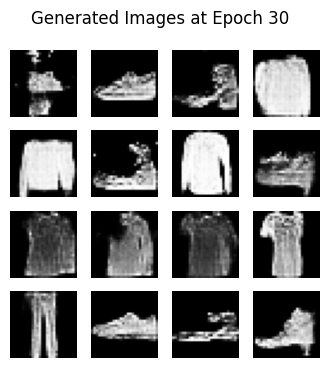

Epoch 31/50 completed


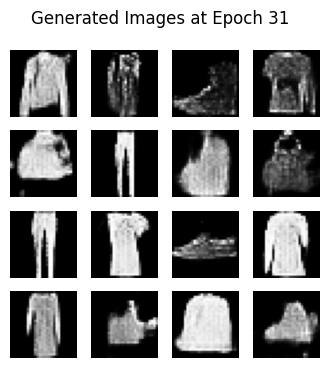

Epoch 32/50 completed


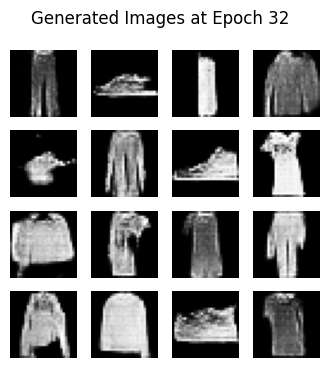

Epoch 33/50 completed


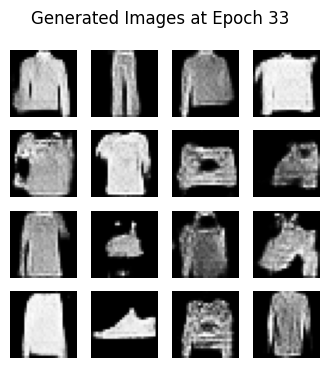

Epoch 34/50 completed


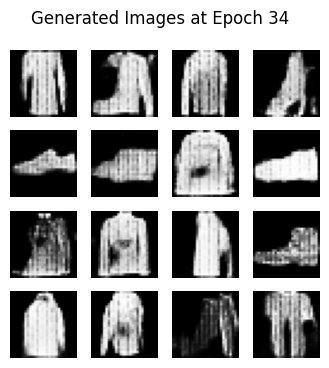

Epoch 35/50 completed


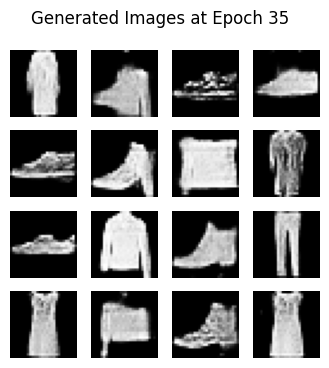

Epoch 36/50 completed


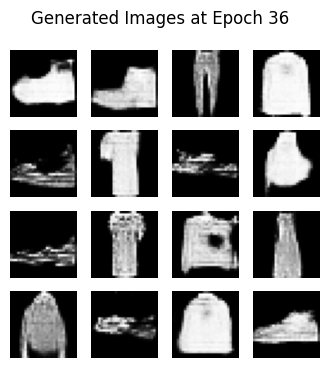

Epoch 37/50 completed


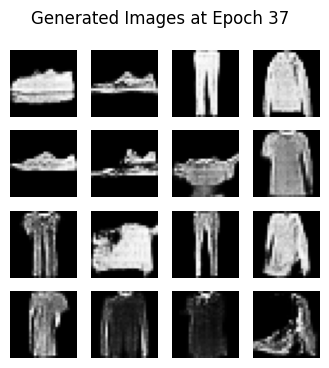

Epoch 38/50 completed


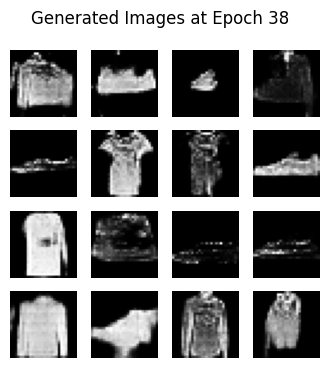

Epoch 39/50 completed


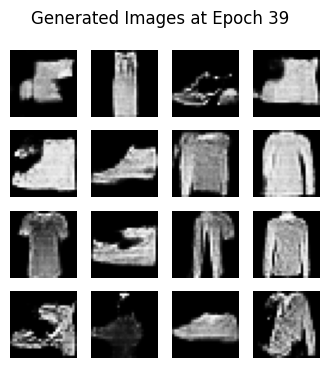

Epoch 40/50 completed


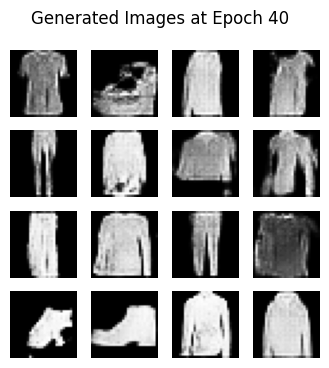

Epoch 41/50 completed


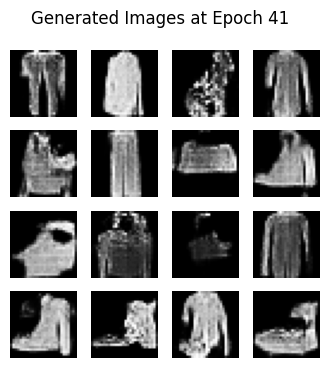

Epoch 42/50 completed


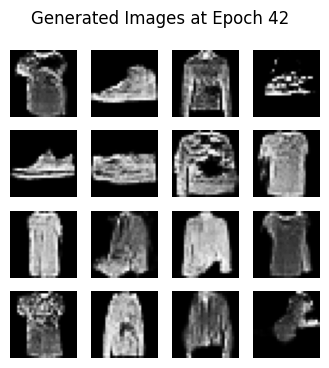

Epoch 43/50 completed


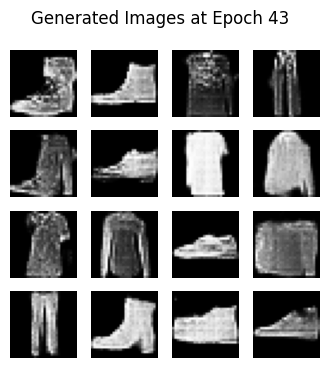

Epoch 44/50 completed


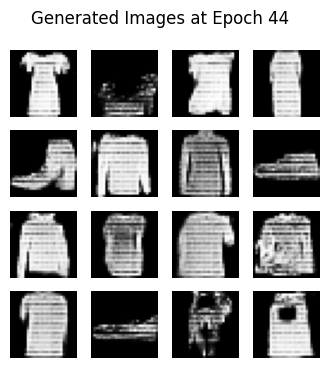

Epoch 45/50 completed


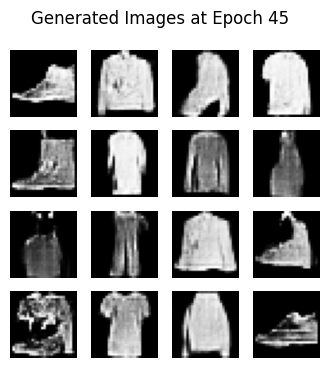

Epoch 46/50 completed


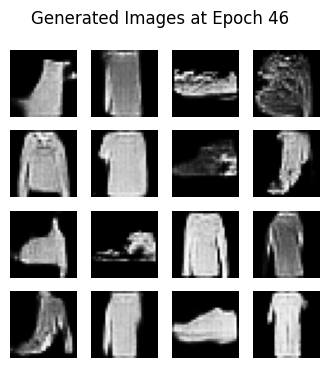

Epoch 47/50 completed


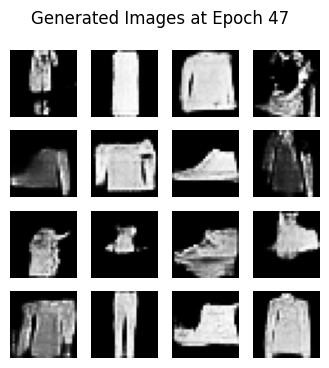

Epoch 48/50 completed


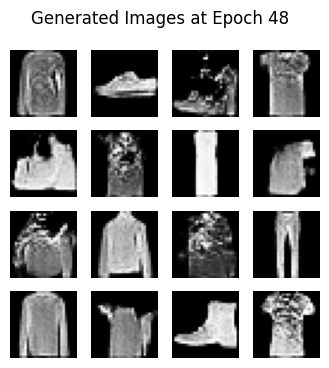

Epoch 49/50 completed


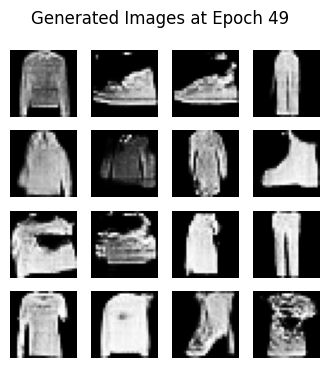

Epoch 50/50 completed


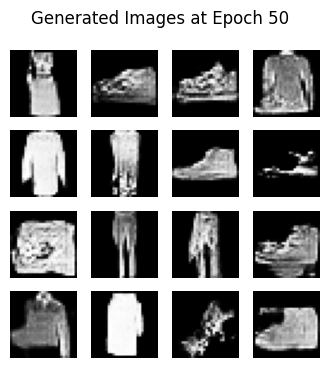

In [ ]:
# Step 9: Train the GAN
train(dataset, epochs=50)

In [ ]:
generator.save('fashion_gan_generator.h5')